In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
plt.rcParams.update({'font.size': 11})   # Set the default font size for plots

<h1 style="color:blue">1. Load DatasSet

In [4]:
print(os.getcwd())

C:\Users\DFigurado


In [5]:
df_raw = pd.read_csv("C:/Research/Msc/CMM709/CAUSALITY-EXPLORE/data/raw/medical_appointment_no_show.csv")
df_raw

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


<h1 style="color:blue">2. Initial Exploration of the Dataset.</h1>

<h2 style="color:yellow"> 2.1 Data Types associated with each column</h2>

In [6]:
# Data Types of each column
print(f"Data types of Columns",df_raw.info())
print(f"Column Names: ", df_raw.columns.to_list())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
Data types of Columns None
Column Names:  ['PatientId', 'AppointmentID', 'Gender', 'Schedu

Column needs to be transformed to appropriate data types.
- The columns -> `Scholarship`,`Hypertension`,`Diabetes`,`Alcoholism`, `Alcoholism` can be identifies as `boolean` and should be converted to bool type.
- The columns -> `Gender` and `Handicap` need to transformed to category type.
- The `day` column need to be transformed to datetime type.
- `Neighbourhood` needs further investigation to identify the type of data it contains.

From the above information of the DataFrame and the sample data we can see that there are 14 columns in total.

- There are 13 independent Variables -> [`PatientId`,`AppointmentID`,`Gender`,`ScheduleDay`,`AppointmentDay`,`Age`,`Neighbourhood`,`Scholarship`,`Hipertension`,`Diabetes`,'Alcoholism`,'Handcap`,`SMSReceived`]
- The Dependent Variable is -> [`NoShow`]
- The independent variables -> [`PatientId`,`AppointmentID`] are system generated numbers and shouldn't be used for prediction dependant variable. hence will be dropped.

<h2 style="color:yellow"> 2.2 Shape of the dataframe, number of rows and columns.</h2>

In [7]:
print(f"Shape of the dataframe - Rows: ", df_raw.shape[0])
print(f"Shape of the dataframe - Columns: ", df_raw.shape[1])

Shape of the dataframe - Rows:  110527
Shape of the dataframe - Columns:  14


<h2 style="color:yellow">2.3 Check for `null` and `missing` values.</h2>

In [8]:
print(f"Null values in the dataframe:\n", df_raw.isnull().sum())
print(f"Missing values in the dataframe:\n", df_raw.isna().sum())

Null values in the dataframe:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64
Missing values in the dataframe:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


<h2 style="color:yellow">2.4 Describe the Data</h2>

In [9]:
df_raw.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As there is only 1 patient with Age less than 0 we will delete that record assuming that this as an human introduced error.

<h2 style="color:yellow">2.5 Print Unique values for `Age` column.</h2>

In [10]:
print("Unique values in the `Age` column => {}".format(df_raw.Age.unique()))

Unique values in the `Age` column => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


<h2 style="color:yellow">2.6 Print Unique values for `AppentmentDay` column.</h2>

In [11]:
print("Unique values in the `AppointmentDay` column => {}".format(df_raw.AppointmentDay.unique()))

Unique values in the `AppointmentDay` column => ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']


<h2 style="color:yellow"> 2.7 Print Unique values for `ScheduledDay` column.</h2>

In [12]:
print("Unique values in the `ScheduledDay` column => {}".format(df_raw.ScheduledDay.unique()))

Unique values in the `ScheduledDay` column => ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']


<h2 style="color:yellow">2.8 Print Unique values for `Neighbourhood` column.</h2>

In [13]:
print(df_raw['Neighbourhood'].value_counts())

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64


<h2 style="color:yellow">2.9 Data Cleaning</h2>

#### Quality Observations

- Data Quality: All columns are present and without any missing values.
- Data Types:
   - PatientId and AppointmentID are of type `float`, but they should be `int64`
   - Datas should be converted from `object` to `datetime`.
      - We remove <i>time</i> from <i>AppointmentDay's</i> timestamp we will do a similar thing for <i>ScheduledDay's</i> also. (Ideally, the Time in AppointmentDay column will help us better rather than in the <i>ScheduledDay</i>)
   - The <i>ScheduledDay</i> and <i>AppointmentDay</i> has `00:00:00:00` in its TimeStamp, we will ignore it.
   - Some categorical field `Gener`, `Neighbourhood`, `No-show` should be encoded for modeling.
   - Age has a value of -1 which is not valid. This should be corrected.
   - Appointment <i>LeadTime</i> shows negative lead-time which is an anomally probably caused during data collection.
- Typo corrections and standardization:
   - `Hipertension` should be corrected to `hypertension`.
   - `Handcap` should be corrected to `handicap`.
   - `SMS_received` should be corrected to `sms_Received`.
   - `No-show` should be corrected to `no_show`.

<h3 style="color:lightgreen">2.9.1 Change column names to small caps and fix `typos`</h3

In [14]:
temp_df = df_raw.copy()

temp_df.columns = [col.strip().lower()
  .replace("-", "")
  .replace(" ", "_")
  .replace("hipertension", "hypertension")
  .replace("handcap", "handicap") for col in df_raw.columns]

temp_df.rename(columns={
    "patientid":"patient_id",
    "appointmentid":"appointment_id",
    "appointmentday":"appointment_day",
    "scheduledday":"scheduled_day",
    "noshow":"no_show"
}, inplace=True)

temp_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<h3 style="color:lightgreen">2.9.2 Convert data types</h3

In [15]:
# Convert patient_id and appointment_id to int64
temp_df['patient_id'] = temp_df['patient_id'].astype('int64')
temp_df['appointment_id'] = temp_df['appointment_id'].astype('int64')

# Change `gender`, `neighbourhood`, `handicap`, to categorical type
for col in ['gender','neighbourhood','handicap']:
    temp_df[col] = temp_df[col].astype('category')

# Change scholarship, hypertension, diabetes, alcoholism, sms_received to boolean type
for col in ['scholarship','hypertension','diabetes','alcoholism','sms_received']:
    temp_df[col] = temp_df[col].astype('bool')

# NoShow column transformation and change to boolean type
temp_df['no_show'].replace({'No': 0, 'Yes': 1}, inplace=True)
temp_df['no_show'] = temp_df['no_show'].astype('bool')

# Convert `Appointment Day` and `Scheduled Day`to date ignoring
temp_df['scheduled_day'] = pd.to_datetime(temp_df['scheduled_day']).dt.date
temp_df['appointment_day'] = pd.to_datetime(temp_df['appointment_day']).dt.date

temp_df

C:\Users\DFigurado\AppData\Local\Temp\ipykernel_34196\2802189573.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df['no_show'].replace({'No': 0, 'Yes': 1}, inplace=True)
C:\Users\DFigurado\AppData\Local\Temp\ipykernel_34196\2802189573.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  te

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,0,True,False
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,0,True,False
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,0,True,False
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,0,True,False


In [16]:
temp_df.dtypes

patient_id            int64
appointment_id        int64
gender             category
scheduled_day        object
appointment_day      object
age                   int64
neighbourhood      category
scholarship            bool
hypertension           bool
diabetes               bool
alcoholism             bool
handicap           category
sms_received           bool
no_show                bool
dtype: object

<h3 style="color:lightgreen">2.9.3 Drop negaive <i>Lead Time</i> in schedule.</h3>

In [17]:
# Calculate lead time in the past days
temp_df['leadtime'] = (pd.to_datetime(temp_df['appointment_day']) - pd.to_datetime(temp_df['scheduled_day'])).dt.days
temp_df = temp_df[temp_df['leadtime'] >= 0].reset_index(drop=True)

<h3 style="color:lightgreen">2.9.4 Drop all records were the age is less than 0

In [18]:
temp_df = temp_df[(temp_df['age'] >= 0) & (temp_df['age'] <= 120)].reset_index(drop=True)

<h1 style="color:blue"> 3. Exploratory Data Analysis (EDA)</h1>

In [19]:
new_df = temp_df.copy(deep=True)
new_df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,leadtime
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110516,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,0,True,False,35
110517,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,0,True,False,35
110518,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,0,True,False,41
110519,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,0,True,False,41


<h2 style="color:yellow">3.1 No-show Distribution</h2>

In [20]:
no_show_distribution = new_df.groupby('no_show').count()['age']
print("No-show Rate:\n", no_show_distribution)

No-show Rate:
 no_show
False    88207
True     22314
Name: age, dtype: int64


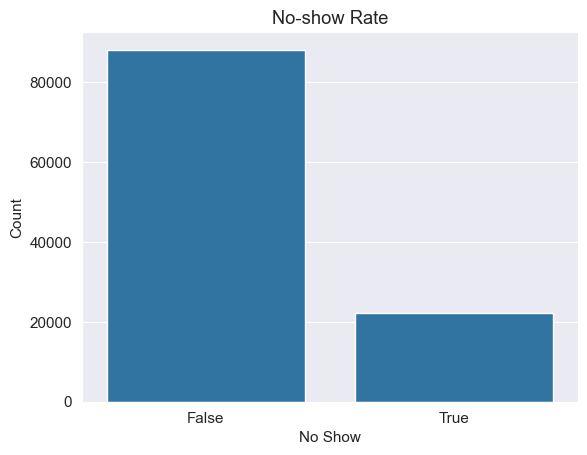

In [21]:
# Visualise no-show rate
sns.countplot(x='no_show', data=new_df)
plt.title('No-show Rate')
plt.xlabel('No Show')
plt.ylabel('Count')
plt.show()

In [22]:
no_show_proportion = new_df['no_show'].sum() / len(new_df.index)
print("no show proportion", no_show_proportion)

no show proportion 0.2018982817745044


<h2 style="color:yellow">3.2 `Gender` Distribution </h2>

In [23]:
# Gender distribution
gender_distribution = new_df['gender'].value_counts(normalize=True) * 100
print("Distribution", gender_distribution)

Distribution gender
F    64.997602
M    35.002398
Name: proportion, dtype: float64


In [24]:
# No-show rate by gender
no_show_by_gender = new_df.groupby('gender')['no_show'].value_counts(normalize=True) * 100
print(no_show_by_gender)

gender  no_show
F       False      79.688457
        True       20.311543
M       False      80.036190
        True       19.963810
Name: proportion, dtype: float64


C:\Users\DFigurado\AppData\Local\Temp\ipykernel_34196\411995252.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_show_by_gender = new_df.groupby('gender')['no_show'].value_counts(normalize=True) * 100


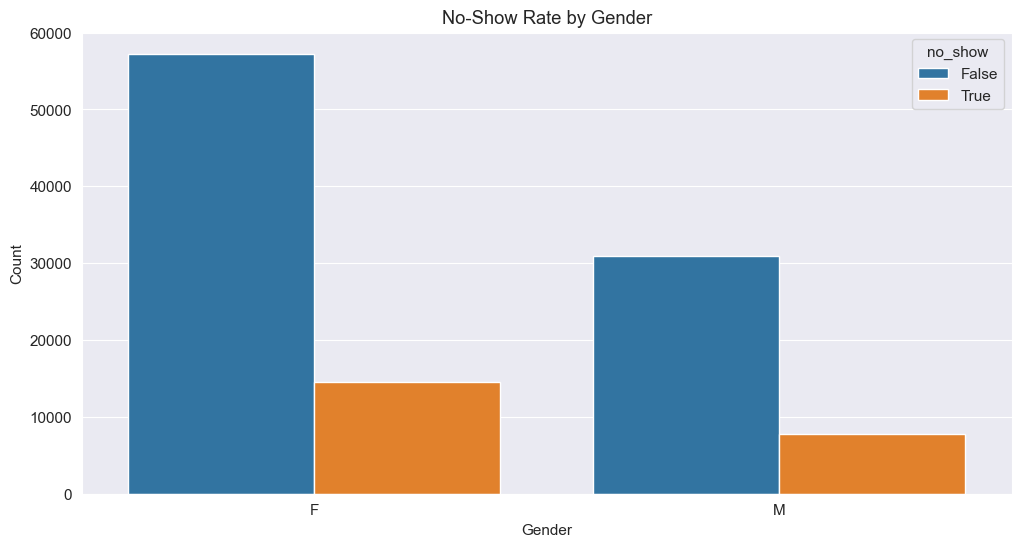

In [25]:
# Visualize gender distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='no_show', data=new_df)
plt.title('No-Show Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<h2 style="color:yellow">3.3 Age Distribution</h2>

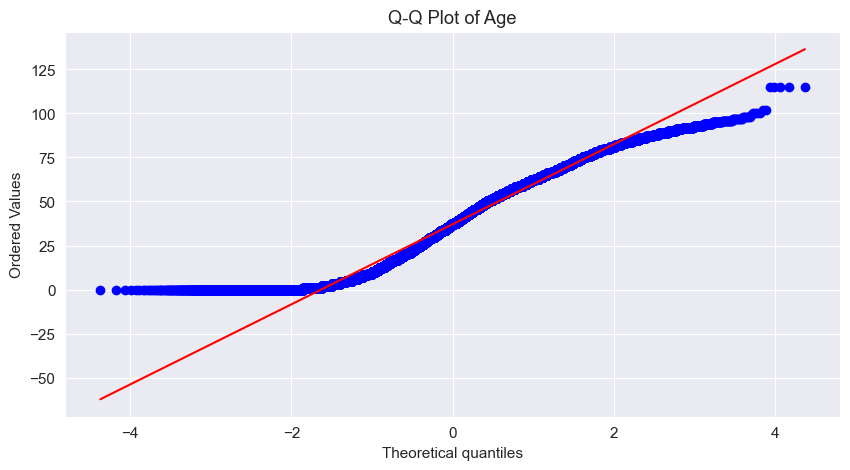

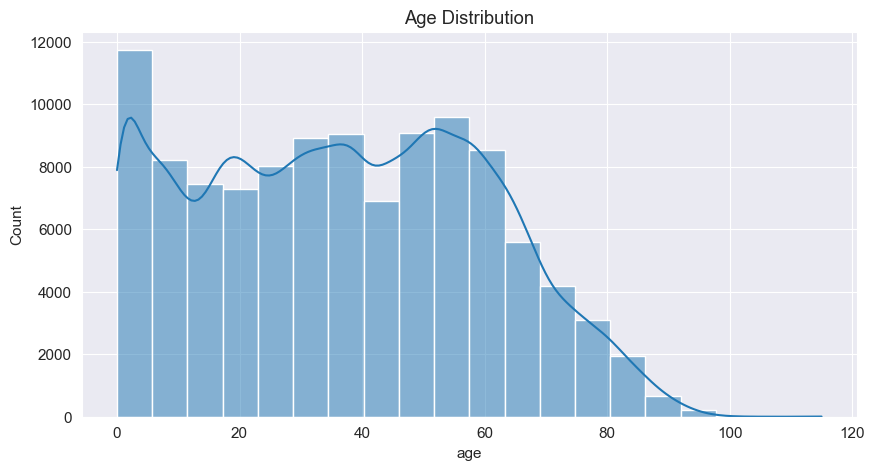

<Axes: xlabel='age'>

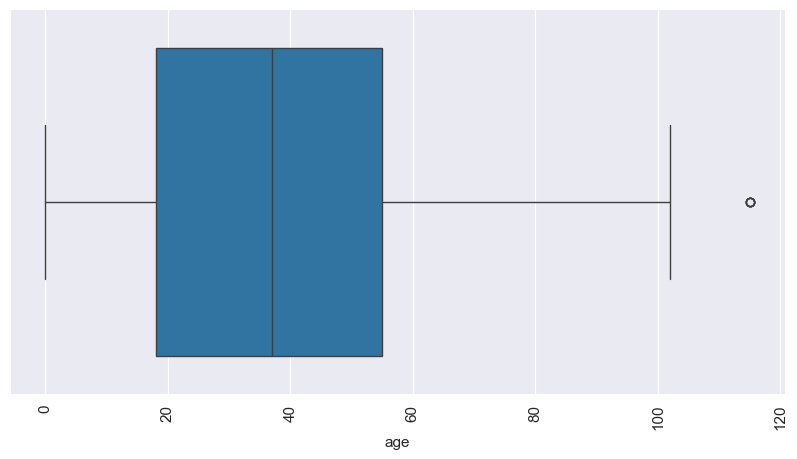

In [26]:
plt.figure(figsize=(10, 5))
stats.probplot(new_df['age'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Age')
plt.show()

# Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(new_df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.boxplot(x=new_df['age'])

In [27]:
# No-show rate by age group
new_df['age_group'] = pd.cut(new_df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])
no_show_by_age = new_df.groupby('age_group')['no_show'].value_counts(normalize=True) * 100
print(no_show_by_age)

age_group  no_show
0-18       False      77.465845
           True       22.534155
19-35      False      76.171535
           True       23.828465
36-50      False      79.677813
           True       20.322187
51-65      False      83.450863
           True       16.549137
66+        False      84.488076
           True       15.511924
Name: proportion, dtype: float64


C:\Users\DFigurado\AppData\Local\Temp\ipykernel_34196\3933362487.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_show_by_age = new_df.groupby('age_group')['no_show'].value_counts(normalize=True) * 100


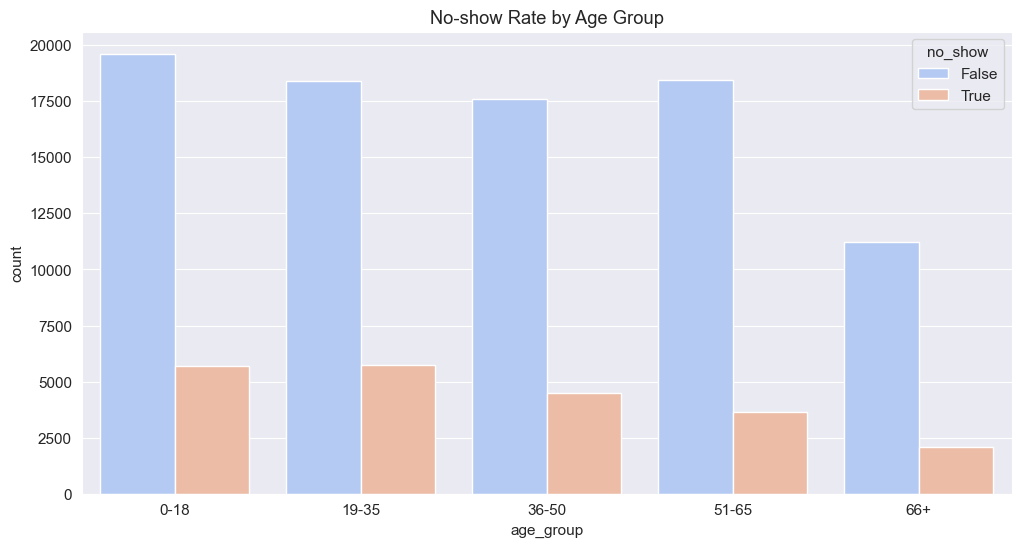

In [28]:
plt.figure(figsize=(12, 6))
# Visualise no-show rate by age group,
sns.countplot(x='age_group', hue='no_show', data=new_df, palette="coolwarm")
plt.title('No-show Rate by Age Group')
plt.show()

<h2 style="color:yellow">3.4 Most common neighborhoods for appointments</h2>

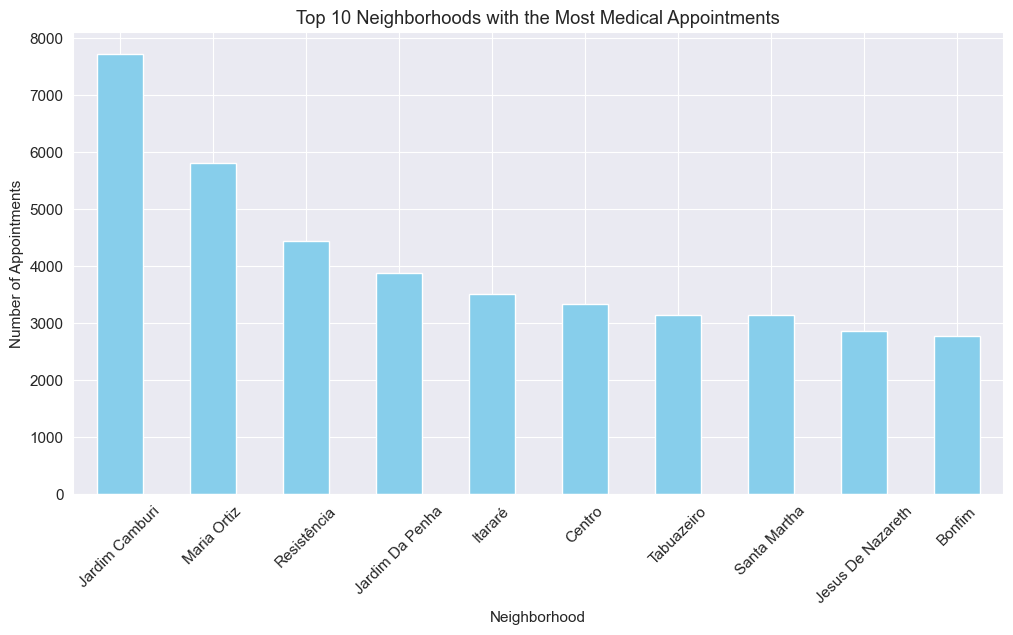

In [29]:
plt.figure(figsize=(12, 6))

neighborhood_counts = new_df['neighbourhood'].value_counts().head(10)
neighborhood_counts.index = neighborhood_counts.index.str.title()
neighborhood_counts.plot(kind='bar', color='skyblue')

plt.title('Top 10 Neighborhoods with the Most Medical Appointments')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.show()

<h2 style="color:yellow"> 3.5 Distribution of appointment dates </h2>

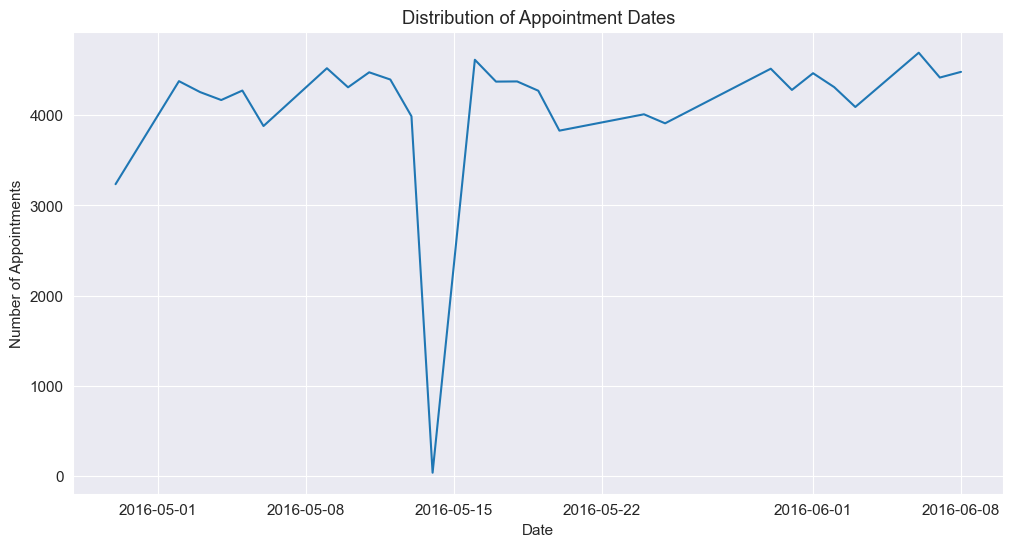

In [30]:
plt.figure(figsize=(12, 6))
new_df['appointment_day'].value_counts().sort_index().plot()
plt.title('Distribution of Appointment Dates')
plt.xlabel('Date')
plt.ylabel('Number of Appointments')
plt.show()

<h2 style="color:yellow"> 3.6 How far in advance are the appointments scheduled </h2>

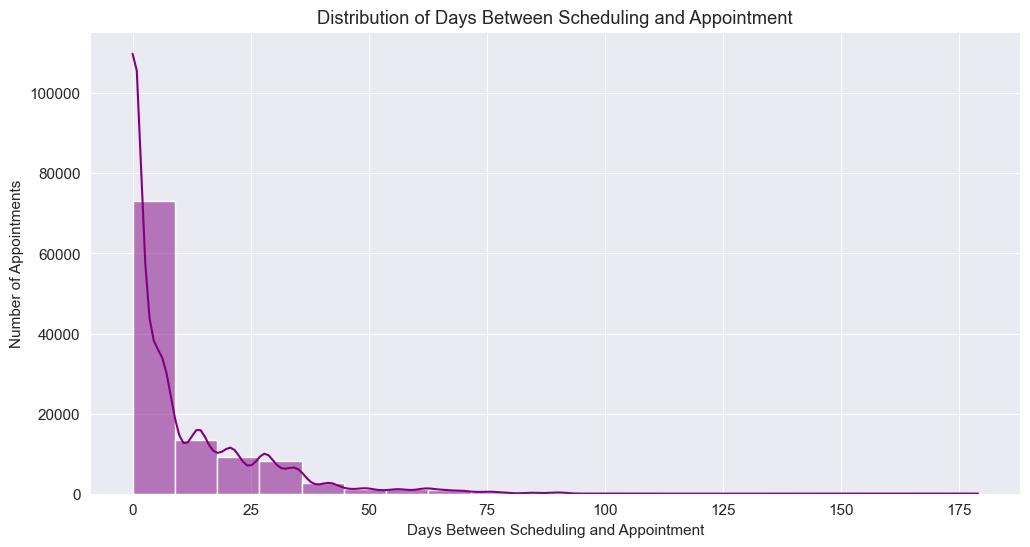

In [31]:
new_df['days_between_appointment'] = (pd.to_datetime(new_df["appointment_day"]) - pd.to_datetime(new_df['scheduled_day'])).dt.days

plt.figure(figsize=(12, 6))
sns.histplot(new_df['days_between_appointment'], bins=20, kde=True, color='Purple')
plt.title('Distribution of Days Between Scheduling and Appointment')
plt.xlabel('Days Between Scheduling and Appointment')
plt.ylabel('Number of Appointments')
plt.show()

<h2 style="color:yellow">3.7 No-show rates based on scheduling in advance</h2>

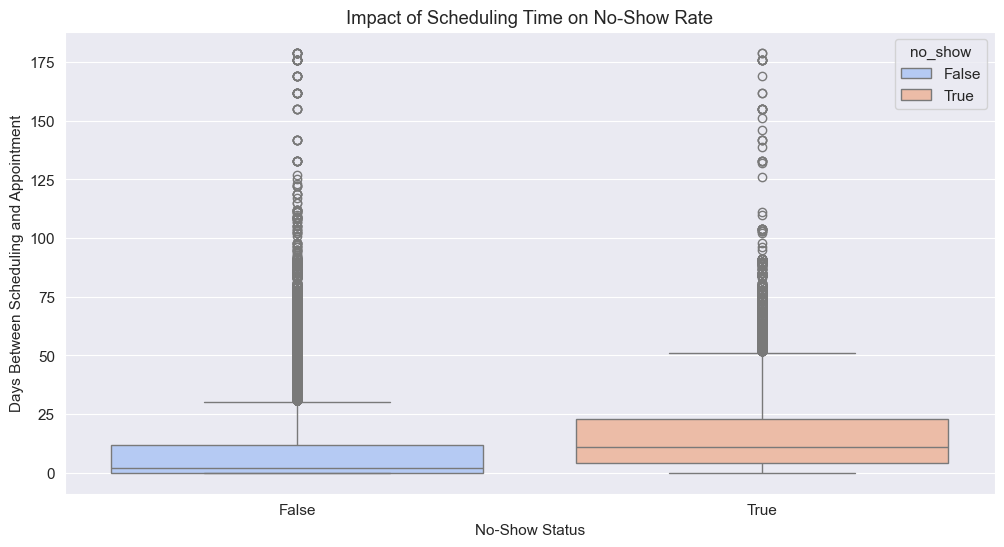

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=new_df['no_show'], y=new_df['days_between_appointment'], hue=new_df['no_show'], palette="coolwarm")
plt.title('Impact of Scheduling Time on No-Show Rate')
plt.xlabel('No-Show Status')
plt.ylabel('Days Between Scheduling and Appointment')
plt.show()

<h2 style="color:yellow">3.8 No-show rate by weekday</h2>

In [33]:
# `No Show` encoding
# new_df['no_show'] = new_df['no_show'].map({'Yes': 1, 'No': 0})
# new_df

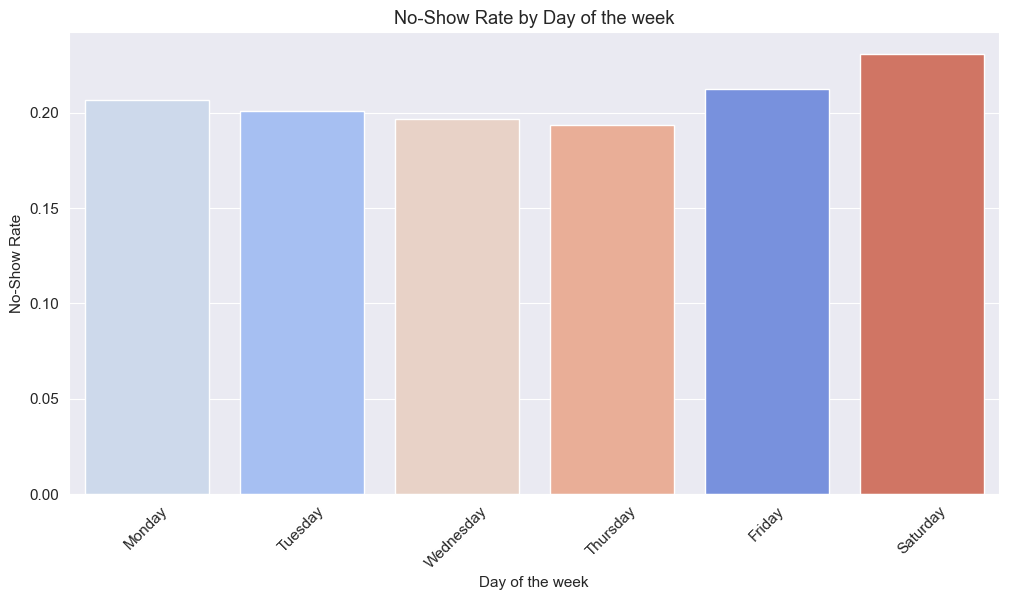

In [34]:
new_df['appointment_weekday'] = pd.to_datetime(new_df['appointment_day']).dt.day_name()

plt.figure(figsize=(12, 6))
sns.barplot(x=new_df['appointment_weekday'], y=new_df['no_show'], hue=new_df['appointment_weekday'], order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"], palette="coolwarm", errorbar=None)
plt.title('No-Show Rate by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('No-Show Rate')
plt.xticks(rotation=45)
plt.show()

<h2 style="color:yellow">3.9 No-show rate for patients with scholarship</h2>

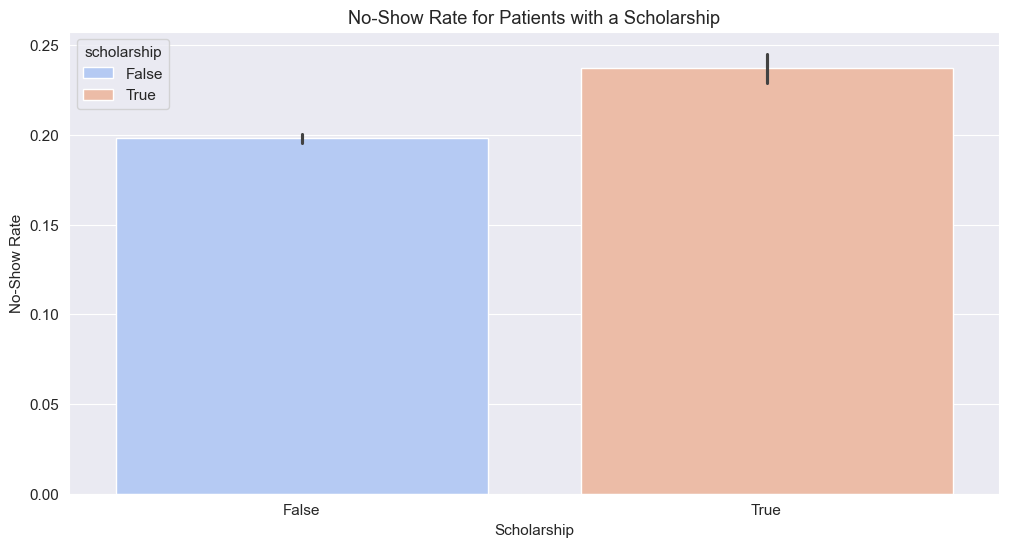

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x=new_df['scholarship'], y=new_df['no_show'], hue=new_df['scholarship'], palette="coolwarm")
plt.title('No-Show Rate for Patients with a Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('No-Show Rate')
plt.show()

<h2 style="color:yellow"> 3.10 No-show rate for patients with `hypertension` or `diabetes`</h2>

In [36]:
# Convert 'No_show' to numeric (1 for 'Yes', 0 for 'No')
#new_df['no_show'] = new_df['no_show'].map({1: 'Yes', 0: 'No'})

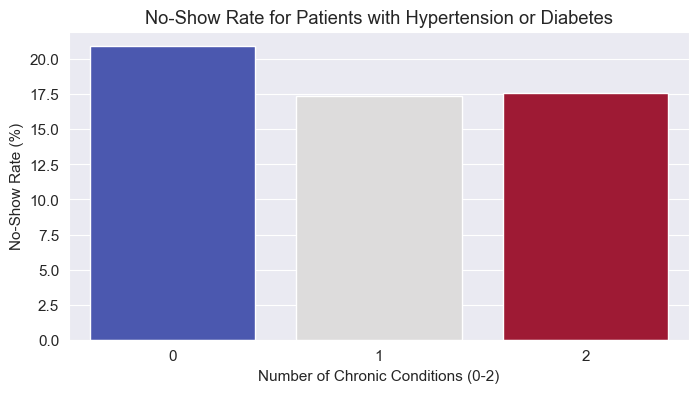

In [37]:
# No-show rate for patients with hypertension or diabetes
#new_df['no_show'] = new_df['no_show'].map({'Yes': 1, 'No': 0})
# Create a new column for the number of chronic conditions (Hypertension or Diabetes)
new_df['num_chronic_conditions'] = new_df[['hypertension','diabetes']].sum(axis=1)
# Group by the number of chronic conditions and calculate the no-show rate
no_show_by_chronic = new_df.groupby('num_chronic_conditions')['no_show'].mean() * 100
# Reset index for plotting
no_show_by_chronic = no_show_by_chronic.reset_index()
# Plot the no-show rate
plt.figure(figsize=(8, 4))
sns.barplot(x='num_chronic_conditions', y='no_show', hue='num_chronic_conditions', data=no_show_by_chronic, palette="coolwarm", legend=False)
plt.title('No-Show Rate for Patients with Hypertension or Diabetes')
plt.xlabel("Number of Chronic Conditions (0-2)")
plt.ylabel("No-Show Rate (%)")
plt.show()

<h2 style="color:yellow">3.11 No-sho rate for patients with Alcoholism</h2>

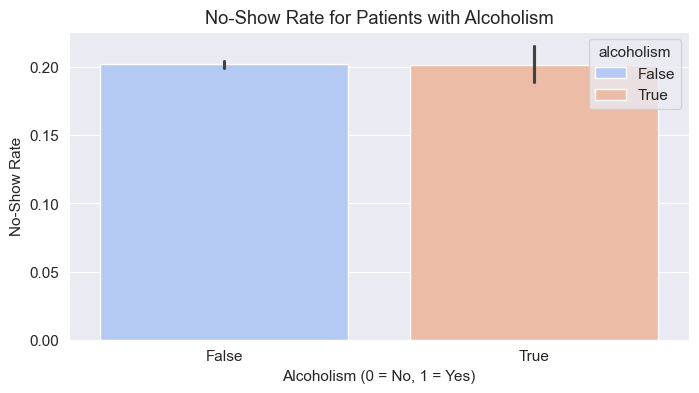

In [38]:
plt.figure(figsize=(8, 4))
sns.barplot(x=new_df['alcoholism'], y=new_df['no_show'], hue=new_df['alcoholism'], palette="coolwarm")
plt.title('No-Show Rate for Patients with Alcoholism')
plt.xlabel('Alcoholism (0 = No, 1 = Yes)')
plt.ylabel('No-Show Rate')
plt.show()

<h2 style="color:yellow">3.12 No-Show rate by handicap status</h2>

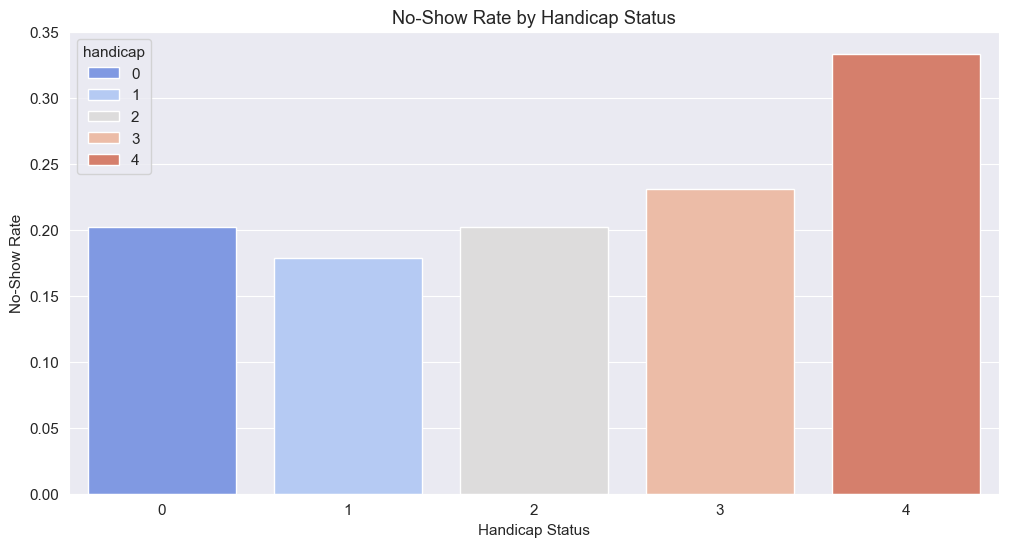

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x=new_df['handicap'], y=new_df['no_show'], hue=new_df['handicap'] ,palette="coolwarm", errorbar=None)
plt.title('No-Show Rate by Handicap Status')
plt.xlabel('Handicap Status')
plt.ylabel('No-Show Rate')
plt.show()

<h2 style="color:yellow">3.13 Does receiving an SMS reminder reduce the likelihood of a now-show?</h2>

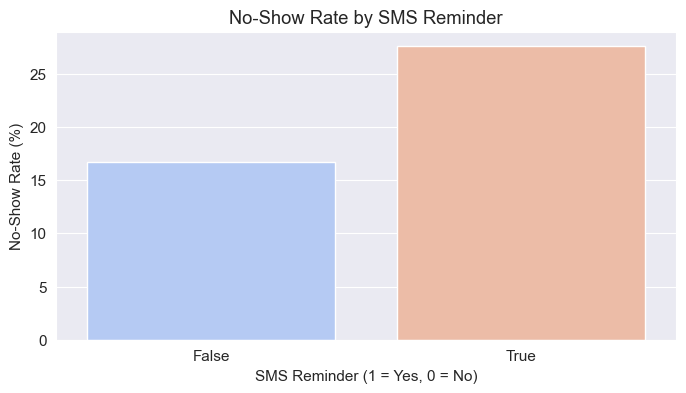

In [40]:
# Grouped by SMS_Received and calculate the no-show rate
no_show_by_sms = new_df.groupby('sms_received')['no_show'].mean() * 100

# Reset index for plotting
no_show_by_sms = no_show_by_sms.reset_index()

# Plot the no-show rate
plt.figure(figsize=(8, 4))
sns.barplot(x='sms_received', y='no_show', hue='sms_received', data=no_show_by_sms, palette="coolwarm", legend=False)
plt.title('No-Show Rate by SMS Reminder')
plt.xlabel('SMS Reminder (1 = Yes, 0 = No)')
plt.ylabel('No-Show Rate (%)')
plt.show()

<h2 style="color:yellow"> 3.14 No-Show rate by SMS received</h2>

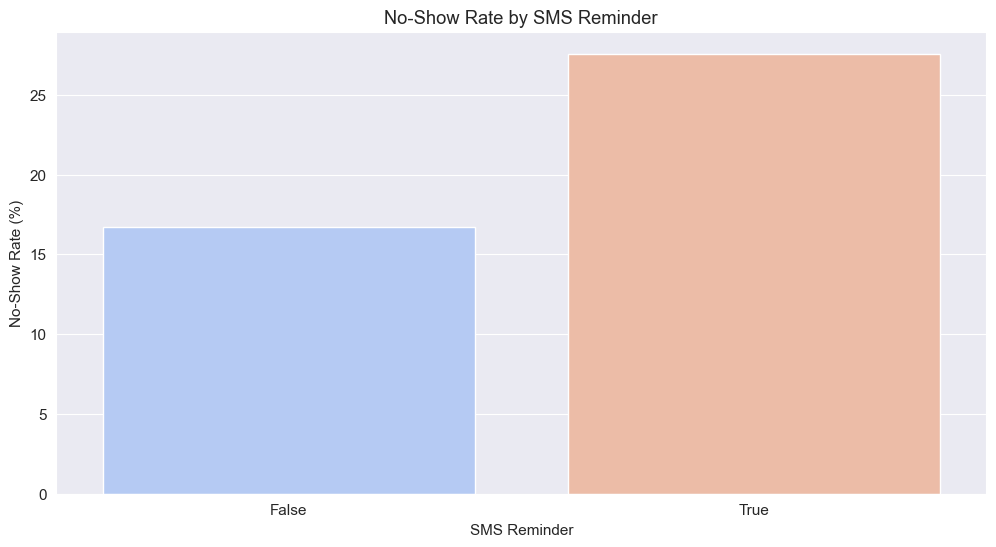

In [41]:
new_df['sms_received_label'] = new_df['sms_received']

no_show_by_sms_count = new_df.groupby('sms_received_label')['no_show'].mean() * 100
no_show_by_sms_count = no_show_by_sms_count.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='sms_received_label', y='no_show', hue='sms_received_label', data=no_show_by_sms_count, palette="coolwarm", legend=False)
plt.title('No-Show Rate by SMS Reminder')
plt.xlabel('SMS Reminder')
plt.ylabel('No-Show Rate (%)')
plt.show()

<h2 style="color:yellow"> 3.15 Which group of patients up less for their scheduled appointments</h2>

C:\Users\DFigurado\AppData\Local\Temp\ipykernel_34196\3194321931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='no_show', color='blue', palette='coolwarm', legend=False)


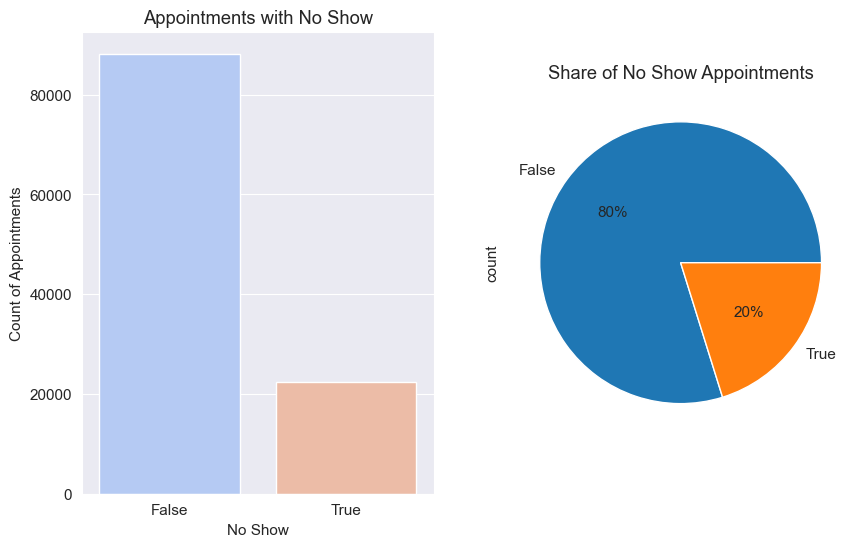

In [42]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=new_df, x='no_show', color='blue', palette='coolwarm', legend=False)
plt.title('Appointments with No Show')
plt.xlabel('No Show')
plt.ylabel('Count of Appointments')

plt.subplot(1, 2, 2)
new_df.no_show.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Share of No Show Appointments')
plt.show()

<h1 style="color:blue">4. Feature Engineering</h1>

 <h2 style="color:yellow"> 4.1 Current columns in the Data Frame</h2>

In [43]:
# Current columns in the DataFrame
new_df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show', 'leadtime', 'age_group', 'days_between_appointment',
       'appointment_weekday', 'num_chronic_conditions', 'sms_received_label'],
      dtype='object')

In [44]:
new_df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,leadtime,age_group,days_between_appointment,appointment_weekday,num_chronic_conditions,sms_received_label
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False,0,51-65,0,Friday,1,False
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,0,51-65,0,Friday,0,False
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,0,51-65,0,Friday,0,False
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,0,0-18,0,Friday,0,False
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False,0,51-65,0,Friday,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110516,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,0,True,False,35,51-65,35,Tuesday,0,True
110517,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,0,True,False,35,51-65,35,Tuesday,0,True
110518,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,0,True,False,41,19-35,41,Tuesday,0,True
110519,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,0,True,False,41,36-50,41,Tuesday,0,True


<h2 style="color:yellow"> 4.2 Create new features based on existing columns</h2>

In [45]:
new_df_features = new_df.copy(deep=True)

In [46]:
# 1. Extract the hour of the day when the appointment was scheduled
new_df_features['scheduled_hour'] = pd.to_datetime(new_df_features['scheduled_day']).dt.hour

In [47]:

# 2. Create a new column for the total number of chronic conditions
new_df_features['appointment_day'] = pd.to_datetime(new_df_features['appointment_day'], errors='coerce')
new_df_features['IsWeekend'] = new_df_features["appointment_day"].dt.day_of_week.isin([5, 6]).astype(int)  # 5 = Saturday, 6 = Sunday

In [48]:

# 3. Create a feature for the number of days until the next appointment (if applicable)
diffs = new_df_features.groupby('patient_id')['appointment_day'].diff()
new_df_features['day_until_next_appointment'] = diffs.dt.days

In [49]:

# 4. Create a feature for the number of previous no-shows by the patient
new_df_features['previous_no_shows'] = new_df_features.groupby('patient_id')['no_show'].cumsum() - new_df_features['no_show']


In [50]:
# 5. Create a feature for the number of previous no-shows by the patient
new_df_features['total_appointments'] = new_df_features.groupby('patient_id')['appointment_id'].transform('count')

<h2 style="color:yellow"> 4.2 Encoding Categorical Variables</h2>

In [51]:
# 6. Encode categorical variables as needed for modeling
new_df_features = pd.get_dummies(new_df_features, columns=["neighbourhood", 'age_group', 'appointment_weekday', 'sms_received_label'], drop_first=True)

In [52]:
# Drop irrelevant columns
new_df_features = new_df_features.drop(columns=['patient_id', 'appointment_id', 'scheduled_day', 'appointment_day'])

In [53]:
new_df_features

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,leadtime,...,age_group_19-35,age_group_36-50,age_group_51-65,age_group_66+,appointment_weekday_Monday,appointment_weekday_Saturday,appointment_weekday_Thursday,appointment_weekday_Tuesday,appointment_weekday_Wednesday,sms_received_label_True
0,F,62,False,True,False,False,0,False,False,0,...,False,False,True,False,False,False,False,False,False,False
1,M,56,False,False,False,False,0,False,False,0,...,False,False,True,False,False,False,False,False,False,False
2,F,62,False,False,False,False,0,False,False,0,...,False,False,True,False,False,False,False,False,False,False
3,F,8,False,False,False,False,0,False,False,0,...,False,False,False,False,False,False,False,False,False,False
4,F,56,False,True,True,False,0,False,False,0,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110516,F,56,False,False,False,False,0,True,False,35,...,False,False,True,False,False,False,False,True,False,True
110517,F,51,False,False,False,False,0,True,False,35,...,False,False,True,False,False,False,False,True,False,True
110518,F,21,False,False,False,False,0,True,False,41,...,True,False,False,False,False,False,False,True,False,True
110519,F,38,False,False,False,False,0,True,False,41,...,False,True,False,False,False,False,False,True,False,True


<h1 style="color:blue"> 5. Predictive Modeling</h1>

<b>Predictive modeling</b> is an aspect of data science and machine learning that involves using historical data to build mathematical model that can predict feature or unknown outcomes. in predictive modelling. 

- Split the dataset into training and testing sets.
- Train and evaluate multiple models
   - Logistic Regression
   - Random Forest
   - XGBoost
- Tune hyperparameter for the best-performance model
- Evaluate the final model using metrics like accuracy, precision, recall, and F1-score


<h2 style="color:yellow"> 5.1 Split the dataset </h2>

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Define features (X) and target (y)
X = new_df_features.drop(columns=['no_show'])
y = new_df_features['no_show']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Impute missing values with the mean (or median/mode)
impute = SimpleImputer(strategy='mean')
X = pd.DataFrame(impute.fit_transform(X), columns=X.columns)

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (88416, 109)
Test set shape: (22105, 109)


<h2 style="color:yellow">5.2 Train and Evaluate Models</h2>

Train and evaluate three models
<ol>
    <li>Logistic Regression</li>
    <li>Random Forest</li>
    <li>XGBoot</li>
</ol>

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    
    return model

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1)

In [56]:
# Evaluate Logistic Regression
print("Logistic Regression Result:")
log_reg = evaluate_model(log_reg, X_train, y_train, X_test, y_test)

Logistic Regression Result:
Accuracy: 0.7977
Precision: 0.4878
Recall: 0.0359
F1 Score: 0.0668
Confusion Matrix:
 [[17474   168]
 [ 4303   160]]
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.99      0.89     17642
        True       0.49      0.04      0.07      4463

    accuracy                           0.80     22105
   macro avg       0.65      0.51      0.48     22105
weighted avg       0.74      0.80      0.72     22105



In [57]:
# Evaluate Random Forest Classifier
print("\nRandom Forest Classifier Result:")
rf_classifier = evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)


Random Forest Classifier Result:
Accuracy: 0.7962
Precision: 0.4847
Recall: 0.1452
F1 Score: 0.2234
Confusion Matrix:
 [[16953   689]
 [ 3815   648]]
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.96      0.88     17642
        True       0.48      0.15      0.22      4463

    accuracy                           0.80     22105
   macro avg       0.65      0.55      0.55     22105
weighted avg       0.75      0.80      0.75     22105



In [58]:
# Evaluate XGBoost Classifier
print("\nXGBoost Classifier Result:")
xgb_classifier = evaluate_model(xgb_classifier, X_train, y_train, X_test, y_test)


XGBoost Classifier Result:
Accuracy: 0.8039
Precision: 0.6275
Recall: 0.0706
F1 Score: 0.1269
Confusion Matrix:
 [[17455   187]
 [ 4148   315]]
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.99      0.89     17642
        True       0.63      0.07      0.13      4463

    accuracy                           0.80     22105
   macro avg       0.72      0.53      0.51     22105
weighted avg       0.77      0.80      0.74     22105



<h2 style="color:yellow"> 5.3 Hyperparameter Tuning</h2>

Using <i>`GridSearchCV`</i> to tune <i>`hyperparameter`</i> for the best-performing model, <i>Random Forest</i>

In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid for each model
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100], # Regularization strength
    'penalty': ['l2', 'l1'],      # Regularization type 
    'solver': ['liblinear']       # Solver for optimization
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],       # Number of trees in the ensemble
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 5, 7],               # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],         # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0]   # Subsample ratio of columns when constructing each tree
}

# Perform GridSearchCV for Logistic Regression
print("Tuning Logistic Regression...")
grid_log_reg = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best cross-validation score for Logistic Regression:", grid_log_reg.best_score_)

# Perform RandomizedSearchCV for Random Forest
print("\nTuning Random Forest...")
random_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", random_rf.best_params_)
print("Best cross-validation score for Random Forest:", random_rf.best_score_)

# Perform RandomizedSearchCV for XGBoost
print("\nTuning XGBoost...")
random_xgb = RandomizedSearchCV(XGBClassifier(random_state=42), param_grid_xgb, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", random_xgb.best_params_)
print("Best cross-validation score for XGBoost:", random_xgb.best_score_)

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.7967110121510489

Tuning Random Forest...
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30}
Best cross-validation score for Random Forest: 0.8044358548829666

Tuning XGBoost...
Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best cross-validation score for XGBoost: 0.8042888261252482


<h1 style="color:blue"> Exploring Hyperparameter Tuning Output</h1>

Detail analysis of the hyperparameter tuning results for each model

<h2 style="color:yellow"> 1. Logistic Regression</h2>
<b>Best Parameters:</b>

<ul>
    <li>C: 0.1 (regularization strength)</li>
    <li>penalty: l1</li>
    <li>solver: liblinear</li>     
</ul>

<b> Best Cross-Validation Score:</b> 0.7970

<b>Key Points</b>
<p>
- The model performance best with <b>strong regularization</b>(C=0.01), indicating that the dataset might have some noise or less important features that need to be penalized.
</p>
<p>
- The choice of <b>L2 penalty</b> suggests that the model benefits from shrinking all coefficients uniformly rather than performing feature selection (which L1 would do)
</p>
<p>
- The cross-validation score of 79.7% is decent but lower than the other models, suggesting that Logistic Regression might not be the best fit for this dataset.
</p>

<h2 style="color:yellow"> 2. Random Forest</h2>

<b>Best Parameters</p>
<ul>
  <li> 
     n_estimators: 200 (number of trees)
  </li>
  <li>
     max_depth: None (no limit on tree depth)
  </li>
  <li>
     min_samples_split: 2 (minimum samples required to split a node)
  </li>
  <li>
    min_samples_leaf: 2 (minimum samples required at each leaf node)
  </li>
</ul>

<b>Best Cross-Validation Score:</b> 0.7236

<b>Key Points</b>

<p>
 - The model performance best with <b>200 tree</b> and <b>no limited on tree depth</b>, indicating that the dataset benefits from complex trees that can capture indicate patterns.
</p>
<p>
 - The <b>low values for min_samples_split and min_samples_leaf</b> suggest that the model can handle smaller subsets of data without over-fitting, likely due to the ensemble nature of Random Forest.
</p>
<p>
- The cross-validation score of 80.49% is slightly better than Logistic Regression, indicating that Random Forest is better fit for dataset.
</p>

<h2 style="color:yellow">3. XGBoost</h2>

<b>Best Parameters</b>

<ul>
  <li>
    n_estimators: 200 (number of boosting rounds)
  </li>
  <li>
    max_depth: 5 (maximum depth of a tree)
  </li>
  <li>
    learning_rate: 0.2 (step size shrinkage)
  </li>
  <li>
    subsample: 0.9 (fraction of samples used for training)
  </li>
  <li>
    colsample_bytree: 1.0 (fraction of features used for training)
  </li>
</ul>

<b>Best Cross-Validation Score:</b> 0.8051

<p>Key points</p>
<p>
- The model performs best with 200 boosting rounds and a moderate learning rate of 0.2, indicating that the dataset benefits from a balance between learning speed and model complexity.
</p>
<p>
- The tree depth of 5 suggests that the dataset does not require very deep trees to capture patterns, which helps prevent over-fitting.
</p>
<p>
- The subsample ratio of 0.9 indicates that the model performs well when using 90% of the data for each tree, introducing some randomness to improve generalization.
</p>
<p>
- The cross-validation score of 80.51% is the highest among the three models, suggesting that XGBoost is the best-performing model for this dataset.
</p>